In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,roc_curve,auc,accuracy_score

In [48]:
import pydotplus

In [7]:
df=pd.read_csv("train.csv")

# decision tree

In [37]:
y=df['Survived']
x=df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Parch','SibSp']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [34]:
df['Age']=df['Age'].fillna(df['Age'].mean().round(2))
df['Embarked']=df['Embarked'].fillna("S")
df['Embarked']=df['Embarked'].map({'C':0,'Q':1,'S':2})
df['Sex']=df['Sex'].map({'female':0,'male':1})

In [5]:
def get_age(age):
    if age<=12:
        return 0
    elif (12<age<=18):
        return 1
    elif (18<age<=30):
        return 2
    elif (30<age<=60):
        return 3
    elif (60<age):
        return 4
def get_fare(fare):
      
    if (fare<=8):
        return 0
    elif (8<fare<=14):
        return 1
    elif (14<fare<=31):
        return 2
    elif (31<fare):
        return 3
  
    

In [35]:
df['Age']=np.array([get_age(x) for x in df['Age']])
df['Fare']=np.array([get_fare(x) for x in df['Fare']])

In [27]:
df_test=pd.read_csv("test.csv")
df_test['Age']=df_test['Age'].fillna(df['Age'].mean().round(2))
df_test['Embarked']=df_test['Embarked'].fillna("S")
df_test['Embarked']=df_test['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Sex']=df_test['Sex'].map({'female':0,'male':1})
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

In [28]:
df_test['Age']=np.array([get_age(x) for x in df_test['Age']])
df_test['Fare']=np.array([get_fare(x) for x in df_test['Fare']])

In [29]:
df_=df_test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Parch','SibSp']]

In [31]:
clf=DecisionTreeClassifier(random_state=2019)

In [39]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')

In [40]:
clf.score(x_test,y_test)

0.7597765363128491

In [41]:
prediction_D=clf.predict(x_test)

#  查准率 = 精度 = precision 

    查全率 = 召回率 = recall
    
    precision=TP/TP+FP
    recall=TP/TP+FN
   

In [42]:
# ([TN,FN],[FP,TP])
confusion_matrix(y_test,prediction_D)

array([[91, 15],
       [28, 45]], dtype=int64)

In [43]:
accuracy_score(y_test,prediction_D)

0.7597765363128491

In [ ]:
accuracy_score(y_test,predictions)

# Tree Visulization


In [44]:
from sklearn.externals.six import StringIO
from IPython.display import Image

In [45]:
dot_data=StringIO()
tree.export_graphviz(clf, out_file=dot_data)

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())#直接在 jupyter notebook 中生成
Image(graph.create_png())

In [63]:
clf=DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.1)

In [64]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
clf.score(x_test,y_test)

0.776536312849162

# logistic

In [12]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_=lr.predict(df_)


In [ ]:
y_1=lr.predict(x_test)

In [13]:
lr.score(x_test,y_test)

0.7988826815642458

In [ ]:
accuracy_score(y_test,y_1)

In [2]:
df=pd.read_csv("train.csv")

In [11]:
y=df['Survived']
x=df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Parch','SibSp']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# 数据处理

In [3]:
df['Age']=df['Age'].fillna(df['Age'].mean().round(2))
df['Embarked']=df['Embarked'].fillna("S")
df['Embarked']=df['Embarked'].map({'C':0,'Q':1,'S':2})

In [4]:
df['Sex']=df['Sex'].map({'female':0,'male':1})

In [7]:
df_test=pd.read_csv("test.csv")

In [8]:
df_test['Age']=df_test['Age'].fillna(df['Age'].mean().round(2))
df_test['Embarked']=df_test['Embarked'].fillna("S")
df_test['Embarked']=df_test['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Sex']=df_test['Sex'].map({'female':0,'male':1})
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

In [22]:
df_test['Survived']=y_
df_test.to_csv('logistic_submission.csv', index=False)

In [8]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null int64
Parch       418 non-null int64
SibSp       418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [7]:
df_=df_test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Parch','SibSp']]

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
Counter(df['Embarked'])

Counter({'S': 646, 'C': 168, 'Q': 77})

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [7]:
Counter(df['Embarked'])

Counter({2: 646, 0: 168, 1: 77})

In [42]:
df['Age'].mean().round(2)

29.7

In [34]:
df.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [27]:
col=['PassengerId','Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [28]:
x_train.head()



,Pclass,Sex,Age,Fare,Embarked,Parch,SibSp
301,3,1,29.7,23.2500,1,0,2
309,1,0,30.0,56.9292,0,0,0
516,2,0,34.0,10.5000,2,0,0
120,2,1,21.0,73.5000,2,0,2
570,2,1,62.0,10.5000,2,0,0


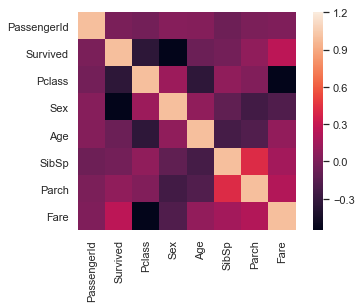

In [21]:
sns.set()
cm=np.corrcoef(df[()
sns.heatmap(corrmat,vmax=1.2,square=True)

AttributeError: module 'matplotlib' has no attribute 'show'

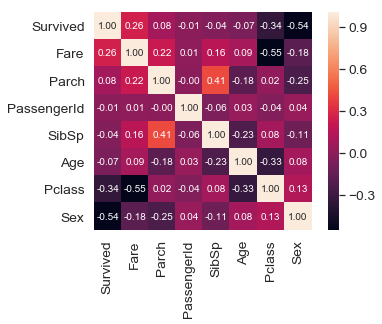

In [39]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index #Get the rows of a DataFrame sorted by the n largest values of columns.
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


e:\软件\python\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'matplotlib' has no attribute 'show'

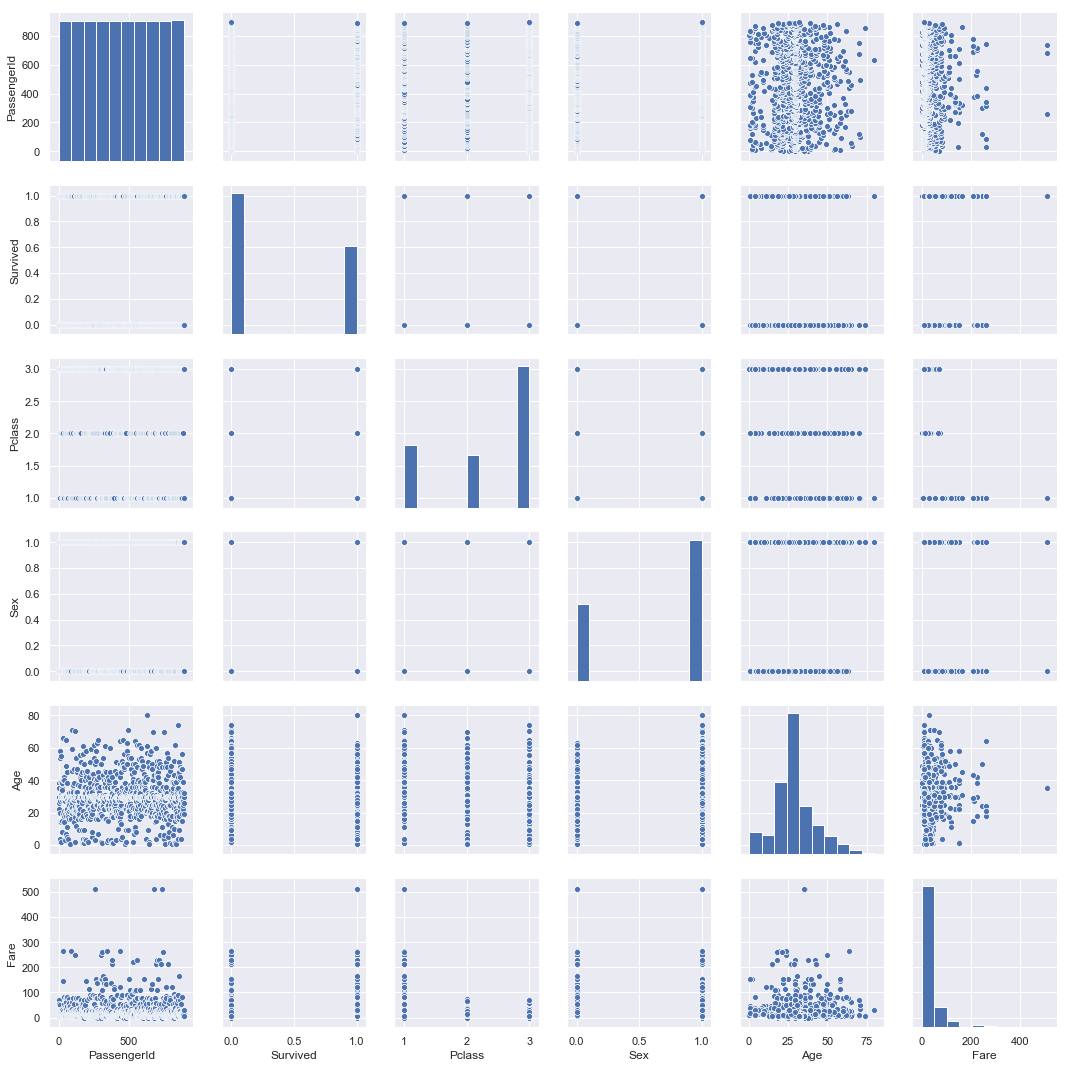

In [10]:
sns.set()
sns.pairplot(df[col], size = 2.5)
plt.show();

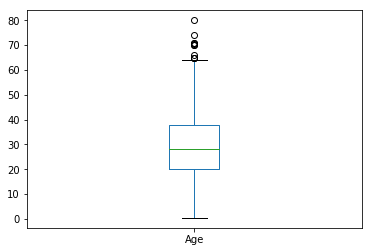

In [20]:
df["Age"].plot.box()